## Part 1 

In [68]:
import pandas as pd  
import matplotlib.pyplot as plt
import datetime, random
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense, Lambda
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers.merge import concatenate as concat
from keras import backend as K
from keras.optimizers import Adam
%matplotlib inline

In [69]:
stocks_df = pd.read_csv("log_features", parse_dates=['timestamp'])

In [74]:
stocks_df.head()

,node_cpu_seconds_total_idle_0,node_cpu_seconds_total_iowait_0,node_cpu_seconds_total_irq_0,node_cpu_seconds_total_nice_0,node_cpu_seconds_total_softirq_0,node_cpu_seconds_total_steal_0,node_cpu_seconds_total_system_0,node_cpu_seconds_total_user_0,node_cpu_seconds_total_idle_1,node_cpu_seconds_total_iowait_1,...,node_cpu_seconds_total_system_3,node_cpu_seconds_total_user_3,node_memory_Active_bytes_idle_0,node_load1_idle_0,node_load5_idle_0,node_load15_idle_0,node_memory_MemAvailable_bytes_idle_0,node_memory_MemFree_bytes_idle_0,node_memory_MemTotal_bytes_idle_0,timestamp
0,1930.48,33.74,0,0.19,0.45,0,51.46,166.2,1934.04,33.01,...,49.36,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:23.553
1,1930.48,33.74,0,0.19,0.45,0,51.46,166.2,1934.04,33.01,...,49.36,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:23.619
2,1930.48,33.74,0,0.19,0.45,0,51.46,166.2,1934.04,33.01,...,49.36,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:23.632
3,1930.48,33.74,0,0.19,0.45,0,51.46,166.2,1934.04,33.01,...,49.36,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:24.062
4,1930.48,33.74,0,0.19,0.45,0,51.46,166.2,1934.04,33.01,...,49.36,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:25.155


In [71]:
stocks_df.shape

(2537, 40)

In [75]:
stocks_df['label']=np.random.choice([1, 0], size=(2537,), p=[1./300,299./300])

In [76]:
stocks_df   ##origial data with label

,node_cpu_seconds_total_idle_0,node_cpu_seconds_total_iowait_0,node_cpu_seconds_total_irq_0,node_cpu_seconds_total_nice_0,node_cpu_seconds_total_softirq_0,node_cpu_seconds_total_steal_0,node_cpu_seconds_total_system_0,node_cpu_seconds_total_user_0,node_cpu_seconds_total_idle_1,node_cpu_seconds_total_iowait_1,...,node_cpu_seconds_total_user_3,node_memory_Active_bytes_idle_0,node_load1_idle_0,node_load5_idle_0,node_load15_idle_0,node_memory_MemAvailable_bytes_idle_0,node_memory_MemFree_bytes_idle_0,node_memory_MemTotal_bytes_idle_0,timestamp,label
0,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:23.553,0
1,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:23.619,0
2,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:23.632,0
3,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:24.062,0
4,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:25.155,0
5,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:26.237,0
6,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:27.329,0
7,1930.48,33.74,0,0.19,0.45,0,51.46,166.20,1934.04,33.01,...,158.14,1253167104,0.47,0.35,0.35,715882496,252026880,3364966400,2019-07-30 09:40:28.417,0
8,1941.58,33.74,0,0.19,0.46,0,52.18,168.68,1944.56,33.01,...,160.92,1282150400,0.52,0.36,0.35,693325824,216670208,3364966400,2019-07-30 09:40:29.502,0
9,1941.58,33.74,0,0.19,0.46,0,52.18,168.68,1944.56,33.01,...,160.92,1282150400,0.52,0.36,0.35,693325824,216670208,3364966400,2019-07-30 09:40:30.579,0


In [46]:
print('Stocks found:', len(set(stocks_df['label'])))
print('Date range:', str(np.min(stocks_df['timestamp']))[:10], '-', str(np.max(stocks_df['timestamp']))[:10])

Stocks found: 2
Date range: 2019-07-30 - timestamp


In [77]:
features=['node_cpu_seconds_total_idle_0', 'node_cpu_seconds_total_iowait_0',
       'node_cpu_seconds_total_irq_0', 'node_cpu_seconds_total_nice_0',
       'node_cpu_seconds_total_softirq_0', 'node_cpu_seconds_total_steal_0',
       'node_cpu_seconds_total_system_0', 'node_cpu_seconds_total_user_0',
       'node_cpu_seconds_total_idle_1', 'node_cpu_seconds_total_iowait_1',
       'node_cpu_seconds_total_irq_1', 'node_cpu_seconds_total_nice_1',
       'node_cpu_seconds_total_softirq_1', 'node_cpu_seconds_total_steal_1',
       'node_cpu_seconds_total_system_1', 'node_cpu_seconds_total_user_1',
       'node_cpu_seconds_total_idle_2', 'node_cpu_seconds_total_iowait_2',
       'node_cpu_seconds_total_irq_2', 'node_cpu_seconds_total_nice_2',
       'node_cpu_seconds_total_softirq_2', 'node_cpu_seconds_total_steal_2',
       'node_cpu_seconds_total_system_2', 'node_cpu_seconds_total_user_2',
       'node_cpu_seconds_total_idle_3', 'node_cpu_seconds_total_iowait_3',
       'node_cpu_seconds_total_irq_3', 'node_cpu_seconds_total_nice_3',
       'node_cpu_seconds_total_softirq_3', 'node_cpu_seconds_total_steal_3',
       'node_cpu_seconds_total_system_3', 'node_cpu_seconds_total_user_3',
       'node_memory_Active_bytes_idle_0', 'node_load1_idle_0',
       'node_load5_idle_0', 'node_load15_idle_0',
       'node_memory_MemAvailable_bytes_idle_0',
       'node_memory_MemFree_bytes_idle_0', 'node_memory_MemTotal_bytes_idle_0']

In [81]:
norm_stocks_df=stocks_df

norm_stocks_df = norm_stocks_df.replace([np.inf, -np.inf], np.nan)
norm_stocks_df = norm_stocks_df.dropna(how='any')

norm_stocks_df




from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#norm_stocks_df.drop('timestamp', axis=1, inplace=True)


norm_stocks_df[features]=scaler.fit_transform(norm_stocks_df[features])


norm_stocks_df #data in scaled and normalized mode

,node_cpu_seconds_total_idle_0,node_cpu_seconds_total_iowait_0,node_cpu_seconds_total_irq_0,node_cpu_seconds_total_nice_0,node_cpu_seconds_total_softirq_0,node_cpu_seconds_total_steal_0,node_cpu_seconds_total_system_0,node_cpu_seconds_total_user_0,node_cpu_seconds_total_idle_1,node_cpu_seconds_total_iowait_1,...,node_cpu_seconds_total_user_3,node_memory_Active_bytes_idle_0,node_load1_idle_0,node_load5_idle_0,node_load15_idle_0,node_memory_MemAvailable_bytes_idle_0,node_memory_MemFree_bytes_idle_0,node_memory_MemTotal_bytes_idle_0,timestamp,label
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:23.553,0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:23.619,0
2,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:23.632,0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:24.062,0
4,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:25.155,0
5,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:26.237,0
6,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:27.329,0
7,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.079452,0.000000,0.005747,1.000000,0.998983,0.0,2019-07-30 09:40:28.417,0
8,0.000560,0.000000,0.0,0.000000,0.003106,0.0,0.000700,0.001426,0.000531,0.000000,...,0.001624,0.156455,0.093151,0.003953,0.005747,0.949368,0.755120,0.0,2019-07-30 09:40:29.502,0
9,0.000560,0.000000,0.0,0.000000,0.003106,0.0,0.000700,0.001426,0.000531,0.000000,...,0.001624,0.156455,0.093151,0.003953,0.005747,0.949368,0.755120,0.0,2019-07-30 09:40:30.579,0


In [82]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

label = stocks_df['label']

le= LabelEncoder().fit(label)
encoded_Y = le.transform(label)
dummy_y = np_utils.to_categorical(encoded_Y)

dummy_y


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [131]:
df=norm_stocks_df[features]

X_train, X_test, y_train, y_test = train_test_split(df[features], dummy_y, test_size=0.20, random_state=26)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=89)



X_test_with_symbol = X_test.copy()


X_test = X_test[features]
X_train = X_train[features]
X_valid = X_valid[features]

m = 50 # batch size

num_batches_train = X_train.shape[0]//m
print(num_batches_train)

X_train_trun = X_train.head(num_batches_train*m)
y_train_trun = y_train[:num_batches_train*m,:]


X_train_trun = X_train.head(num_batches_train*m)
y_train_trun = y_train[:num_batches_train*m,:]

print(y_train_trun)
print(X_train_trun.shape, y_train_trun.shape)

num_batches_valid = X_valid.shape[0]//m
X_valid_trun = X_valid.head(num_batches_valid*m)
y_valid_trun = y_valid[:num_batches_valid*m,:]
print(X_valid_trun.shape, y_valid_trun.shape)

num_batches_test = X_test.shape[0]//m
X_test_trun = X_test.head(num_batches_test*m)
y_test_trun = y_test[:num_batches_test*m,:]
print(X_test_trun.shape, y_test_trun.shape)

36
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
(1800, 39) (1800, 2)
(200, 39) (200, 2)
(500, 39) (500, 2)


## Part 2

In [97]:
## Define Hyperparmeters

m = 50 # batch size
n_z = 2 # latent space size
encoder_dim = 5 # dim of encoder hidden layer
decoder_dim = 5 # dim of decoder hidden layer
decoder_out_dim = X_train.shape[1] # dim of decoder output layer
activ = 'relu'
optim = Adam(lr=0.001)


n_x = X_train.shape[1]
n_y = y_train.shape[1]

In [98]:
## Explicitely define shape for the encoder
X = Input(shape=(n_x,))
label = Input(shape=(n_y,))

## Concatenate the input and the label for the CVAE
inputs = concat([X, label])
print(X,label)

W0730 19:52:41.590801 140028030768960 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 19:52:41.594380 140028030768960 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



Tensor("input_1:0", shape=(?, 39), dtype=float32) Tensor("input_2:0", shape=(?, 2), dtype=float32)


In [99]:
encoder_h = Dense(encoder_dim, activation=activ)(inputs)
mu = Dense(n_z, activation='linear')(encoder_h)
l_sigma = Dense(n_z, activation='linear')(encoder_h)
## Define the latent space - z layer
def sample_z(args):
    mu, l_sigma = args
    eps = K.random_normal(shape=(m, n_z), mean=0., stddev=1.)
    return mu + K.exp(l_sigma / 2) * eps

W0730 19:52:59.486601 140028030768960 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [100]:
# Sampling latent space
z = Lambda(sample_z, output_shape = (n_z, ))([mu, l_sigma])
# merge latent space with label
zc = concat([z, label])

W0730 19:53:08.055850 140028030768960 deprecation_wrapper.py:119] From /home/amal/venv/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [101]:
decoder_hidden = Dense(decoder_dim, activation=activ)
decoder_out = Dense(decoder_out_dim, activation='sigmoid')
h_p = decoder_hidden(zc)
outputs = decoder_out(h_p)

In [103]:
## Model will be trained on vae loss

def vae_loss(y_true, y_pred):
    recon = K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)
    kl = 0.5 * K.sum(K.exp(l_sigma) + K.square(mu) - 1. - l_sigma, axis=-1)
    return recon + kl

def KL_loss(y_true, y_pred):
    return(0.5 * K.sum(K.exp(l_sigma) + K.square(mu) - 1. - l_sigma, axis=1))

def recon_loss(y_true, y_pred):
    return K.sum(K.binary_crossentropy(y_true, y_pred), axis=-1)

# instantiate a the keras model class API
cvae = Model([X, label], outputs)
encoder = Model([X, label], mu)

d_in = Input(shape=(n_z+n_y,))
d_h = decoder_hidden(d_in)
d_out = decoder_out(d_h)
decoder = Model(d_in, d_out)

In [107]:
## Compile function
cvae.compile(optimizer=optim, loss=vae_loss, metrics = [KL_loss, recon_loss])

# compile and fit
n_epoch = 70
cvae_hist = cvae.fit([X_train_trun, y_train_trun], X_train_trun, verbose = 1, batch_size=m, epochs=n_epoch,
        validation_data = ([X_valid_trun, y_valid_trun], X_valid_trun),
        callbacks = [EarlyStopping(patience = 5)]).history

Train on 1800 samples, validate on 200 samples
Epoch 1/70
1800/1800 [==============================] - 2s 1ms/step - loss: 9.2076 - KL_loss: 1.2168 - recon_loss: 7.9908 - val_loss: 9.1671 - val_KL_loss: 1.2112 - val_recon_loss: 7.9559
Epoch 2/70
1800/1800 [==============================] - 0s 121us/step - loss: 9.2389 - KL_loss: 1.2593 - recon_loss: 7.9796 - val_loss: 9.1706 - val_KL_loss: 1.2310 - val_recon_loss: 7.9395
Epoch 3/70
1800/1800 [==============================] - 0s 115us/step - loss: 9.1874 - KL_loss: 1.2347 - recon_loss: 7.9528 - val_loss: 9.3236 - val_KL_loss: 1.1598 - val_recon_loss: 8.1638
Epoch 4/70
1800/1800 [==============================] - 0s 121us/step - loss: 9.1773 - KL_loss: 1.2022 - recon_loss: 7.9752 - val_loss: 9.2526 - val_KL_loss: 1.1835 - val_recon_loss: 8.0690
Epoch 5/70
1800/1800 [==============================] - 0s 116us/step - loss: 9.2657 - KL_loss: 1.2387 - recon_loss: 8.0270 - val_loss: 9.3307 - val_KL_loss: 1.3641 - val_recon_loss: 7.9666
Epoch

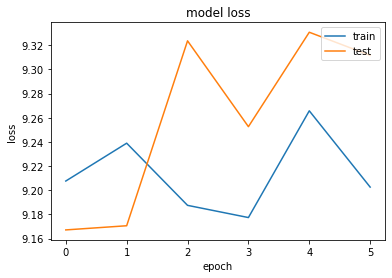

In [108]:
plt.plot(cvae_hist['loss'])
plt.plot(cvae_hist['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

## Part 3

In [109]:
def construct_numvec(identifier, z = None):
    out = np.zeros((1, n_z + n_y))
    out[:, identifier + n_z] = 1.
    if z is None:
        return(out)
    else:
        for i in range(len(z)):
            out[:,i] = z[i]
        return(out)

In [110]:
X_exp, X_rem, y_exp, y_rem = train_test_split(X_train_trun, y_train_trun, test_size=0.20, random_state=19)

In [112]:
z_dataset = encoder.predict([X_rem, y_rem])
print(z_dataset.shape)

(360, 2)


In [113]:
X_rem['z1'] = z_dataset[:,0]
X_rem['z2'] = z_dataset[:,1]
X_rem.head()
# actual range of the 2 dimensions of z
print(np.max(X_rem['z1']))
print(np.min(X_rem['z1']))
print(np.max(X_rem['z2']))
print(np.min(X_rem['z2']))

0.057270024
-0.01425121
1.3453974
-1.2786311


In [114]:

def recon_error_cal(actual,predictions):
    recon_error = np.mean(np.power(actual - predictions, 2))
    recon_array = np.power(actual - predictions, 2)
    max_col = np.argmax(recon_array)
    return recon_error, max_col

In [115]:
# Calculate reconstruction error for every row in X_rem (subset of training set)
recon_on_train = [] 
max_contributor =[]
for i in range(X_rem.shape[0]): # for each row:
    z1 = X_rem.iloc[i]['z1']
    z2 = X_rem.iloc[i]['z2']
    z_ = [z1,z2]  # Define z vector
    identifier = int(np.argmax(y_rem[i]))
    vec = construct_numvec(identifier, z_) # concatenate z and label before passing to the decoder
    # uses identifier and z value 
    test_pred = decoder.predict(vec)
    transpose = test_pred.T
    transpose = np.squeeze(transpose) ## decoder predictions
    actuals = X_rem.iloc[i][features]

    recon_error, max_col = recon_error_cal(actuals, transpose)  ## reconstuction error b/w actuals and predicted
    ## Add this error to recon list
    recon_on_train.append(recon_error)
    max_contributor.append(max_col[0])

In [116]:
len(max_contributor)


360

In [117]:
test_pred


array([[3.77727449e-02, 4.56210077e-02, 3.36766243e-05, 6.32837415e-03,
        1.06123596e-01, 4.11570072e-05, 9.64853466e-02, 8.53182375e-02,
        3.78090739e-02, 3.27115953e-02, 3.91006470e-05, 5.65153360e-03,
        9.51441228e-02, 2.71201134e-05, 9.68721807e-02, 8.73945057e-02,
        3.78665030e-02, 4.98110652e-02, 6.93500042e-05, 1.26448274e-03,
        6.96896315e-02, 5.96344471e-05, 1.02014810e-01, 8.43499601e-02,
        3.79331112e-02, 4.82124686e-02, 1.01685524e-04, 6.38166070e-03,
        1.18247062e-01, 1.08569860e-04, 9.41850841e-02, 8.16653967e-02,
        5.00804126e-01, 3.52250218e-01, 3.51022214e-01, 3.22813779e-01,
        8.44118476e-01, 6.18534863e-01, 7.69504477e-05]], dtype=float32)

In [118]:
recon_train_se = pd.Series(recon_on_train)
print("90th percentile recon error", np.percentile(recon_train_se, 90))
print("95th percentile recon error", np.percentile(recon_train_se, 95))
anomaly_threshold =  np.percentile(recon_train_se, 95)
print('Selected anomaly threshold: ', anomaly_threshold)

90th percentile recon error 0.009065996449255848
95th percentile recon error 0.013354358104419489
Selected anomaly threshold:  0.013354358104419489


## Part 4

In [119]:
## Use encoder to predict the z-space for the test dataset
z_test = encoder.predict([X_test, y_test]) 
print(z_test.shape)

(508, 2)


In [120]:
## Loop through every row of test dataset and calculate reconstruction error 

recon_on_test = []
max_contributor_test =[]

for i in range(z_test.shape[0]): # for each row:
    z_ = z_test[i]  # Define z vector
    identifier = int(np.argmax(y_test[i]))

    vec = construct_numvec(identifier, z_) # concatenate z and label before passing to the decoder
    test_pred = decoder.predict(vec)
    transpose = test_pred.T
    transpose = np.squeeze(transpose) #Decode predictions
    actuals = X_test.iloc[i]

    recon_error , max_col = recon_error_cal(actuals, transpose) # Error calculations 
    ## Add this error to recon list
    recon_on_test.append(recon_error)
    max_contributor_test.append(max_col)
    

recon_test_se = pd.Series(recon_on_test)
recon_test_se.shape

max_col_test = pd.Series(max_contributor_test)
max_col_test.shape

(508,)

In [121]:
## Calculate Anomaly percent of the test dataset
anomaly_count = 0
for i in range(len(recon_test_se)):
    if recon_test_se[i] > anomaly_threshold:F
        anomaly_count +=1
print(anomaly_count/X_test.shape[0])

0.08464566929133858


In [125]:
# investigate what is being flagged as anomalous 
X_test_with_symbol['recon_error'] = recon_on_test


In [126]:
# get all rows with recon_error larger than anomaly_threshold
errs = X_test_with_symbol[X_test_with_symbol['recon_error'] > anomaly_threshold]
errs.sort_values('recon_error', ascending=False)

,node_cpu_seconds_total_idle_0,node_cpu_seconds_total_iowait_0,node_cpu_seconds_total_irq_0,node_cpu_seconds_total_nice_0,node_cpu_seconds_total_softirq_0,node_cpu_seconds_total_steal_0,node_cpu_seconds_total_system_0,node_cpu_seconds_total_user_0,node_cpu_seconds_total_idle_1,node_cpu_seconds_total_iowait_1,...,node_cpu_seconds_total_system_3,node_cpu_seconds_total_user_3,node_memory_Active_bytes_idle_0,node_load1_idle_0,node_load5_idle_0,node_load15_idle_0,node_memory_MemAvailable_bytes_idle_0,node_memory_MemFree_bytes_idle_0,node_memory_MemTotal_bytes_idle_0,recon_error
1427,0.959679,0.977399,0.0,0.986348,0.944099,0.0,0.696599,0.850597,0.959762,0.981218,...,0.689084,0.855791,0.346541,0.136986,0.039526,0.017241,0.298237,0.926208,0.0,0.037359
1436,0.959679,0.977399,0.0,0.986348,0.944099,0.0,0.696599,0.850597,0.959762,0.981218,...,0.689084,0.855791,0.346541,0.136986,0.039526,0.017241,0.298237,0.926208,0.0,0.037359
1428,0.959679,0.977399,0.0,0.986348,0.944099,0.0,0.696599,0.850597,0.959762,0.981218,...,0.689084,0.855791,0.346541,0.136986,0.039526,0.017241,0.298237,0.926208,0.0,0.037359
1438,0.959679,0.977399,0.0,0.986348,0.944099,0.0,0.696599,0.850597,0.959762,0.981218,...,0.689084,0.855791,0.346541,0.136986,0.039526,0.017241,0.298237,0.926208,0.0,0.037359
1426,0.959679,0.977399,0.0,0.986348,0.944099,0.0,0.696599,0.850597,0.959762,0.981218,...,0.689084,0.855791,0.346541,0.136986,0.039526,0.017241,0.298237,0.926208,0.0,0.037359
1421,0.959155,0.975978,0.0,0.986348,0.940994,0.0,0.693526,0.848958,0.959258,0.979663,...,0.686380,0.854342,0.700865,0.000000,0.000000,0.000000,0.255254,0.667458,0.0,0.033082
1412,0.959155,0.975978,0.0,0.986348,0.940994,0.0,0.693526,0.848958,0.959258,0.979663,...,0.686380,0.854342,0.700865,0.000000,0.000000,0.000000,0.255254,0.667458,0.0,0.033082
1407,0.958437,0.974687,0.0,0.986348,0.940994,0.0,0.693390,0.848717,0.958532,0.979663,...,0.686260,0.854155,0.679904,0.013699,0.003953,0.005747,0.261322,0.691245,0.0,0.032883
1409,0.958437,0.974687,0.0,0.986348,0.940994,0.0,0.693390,0.848717,0.958532,0.979663,...,0.686260,0.854155,0.679904,0.013699,0.003953,0.005747,0.261322,0.691245,0.0,0.032883
1398,0.958437,0.974687,0.0,0.986348,0.940994,0.0,0.693390,0.848717,0.958532,0.979663,...,0.686260,0.854155,0.679904,0.013699,0.003953,0.005747,0.261322,0.691245,0.0,0.032883


## Part 5

In [132]:
X_valid


,node_cpu_seconds_total_idle_0,node_cpu_seconds_total_iowait_0,node_cpu_seconds_total_irq_0,node_cpu_seconds_total_nice_0,node_cpu_seconds_total_softirq_0,node_cpu_seconds_total_steal_0,node_cpu_seconds_total_system_0,node_cpu_seconds_total_user_0,node_cpu_seconds_total_idle_1,node_cpu_seconds_total_iowait_1,...,node_cpu_seconds_total_steal_3,node_cpu_seconds_total_system_3,node_cpu_seconds_total_user_3,node_memory_Active_bytes_idle_0,node_load1_idle_0,node_load5_idle_0,node_load15_idle_0,node_memory_MemAvailable_bytes_idle_0,node_memory_MemFree_bytes_idle_0,node_memory_MemTotal_bytes_idle_0
2194,0.987170,0.988764,0.0,0.989761,0.978261,0.0,0.906147,0.952800,0.987238,0.989508,...,0.0,0.904329,0.953858,0.833838,0.868493,0.936759,0.833333,0.071576,0.207306,0.0
1367,0.052063,0.043136,0.0,0.006826,0.149068,0.0,0.141368,0.114768,0.051994,0.030311,...,0.0,0.138179,0.110459,0.792270,0.361644,0.494071,0.551724,0.831124,0.676498,0.0
794,0.029868,0.036033,0.0,0.003413,0.093168,0.0,0.083953,0.071599,0.029784,0.024741,...,0.0,0.083294,0.069370,0.503151,0.301370,0.371542,0.367816,0.917327,0.893579,0.0
176,0.006860,0.000000,0.0,0.000000,0.021739,0.0,0.017485,0.015492,0.006776,0.000000,...,0.0,0.017925,0.014962,0.232383,0.326027,0.177866,0.103448,0.908979,0.623640,0.0
1721,0.969185,0.982436,0.0,0.989761,0.962733,0.0,0.763359,0.898165,0.969234,0.986658,...,0.0,0.758269,0.900951,0.671656,0.706849,0.671937,0.436782,0.140531,0.378959,0.0
1955,0.977955,0.987602,0.0,0.989761,0.968944,0.0,0.834106,0.924169,0.978001,0.988083,...,0.0,0.830328,0.926341,0.792027,0.528767,0.687747,0.580460,0.094478,0.230839,0.0
2197,0.987170,0.988764,0.0,0.989761,0.978261,0.0,0.906147,0.952800,0.987238,0.989508,...,0.0,0.904329,0.953858,0.833838,0.868493,0.936759,0.833333,0.071576,0.207306,0.0
93,0.003769,0.000000,0.0,0.000000,0.009317,0.0,0.008772,0.007907,0.003681,0.000000,...,0.0,0.008822,0.008056,0.221571,0.290411,0.102767,0.057471,0.910827,0.631833,0.0
1769,0.970726,0.983211,0.0,0.989761,0.965839,0.0,0.775739,0.902909,0.970779,0.986658,...,0.0,0.771036,0.905280,0.632830,0.673973,0.703557,0.482759,0.156345,0.425686,0.0
1118,0.042355,0.041069,0.0,0.006826,0.127329,0.0,0.121247,0.100300,0.042239,0.028756,...,0.0,0.119724,0.096876,0.666283,0.443836,0.383399,0.431034,0.838966,0.629149,0.0
